Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [51]:
NAME = "Vladislav Aleksandrov BPM182"
COLLABORATORS = "-"

---

# Интерполяция при помощи полиномов Лагранжа.

In [52]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        n = len(self.xk)
        result = 0
        for k in range(n):
          step_result = 1
          for j in range(n):
            if j == k:
              continue
            step_result *= (x - self.xk[j])/(self.xk[k] - self.xk[j])
          result += self.yk[k] * step_result
        return result

In [53]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


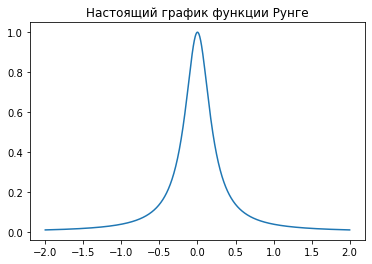


Равномерная сетка:



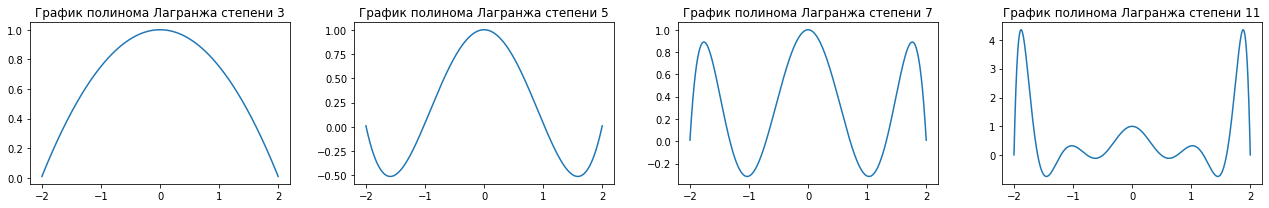


Используя узлы Чебышева:



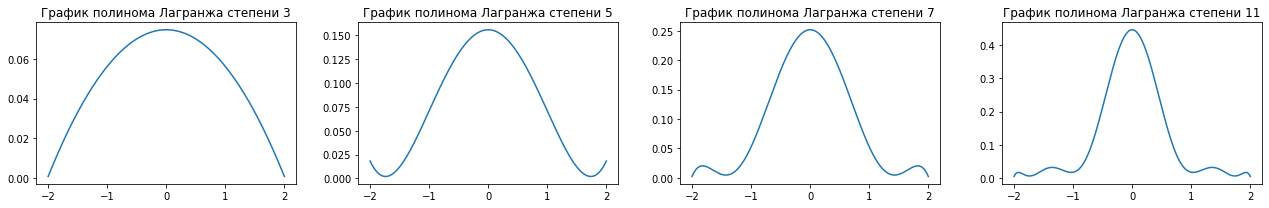

In [54]:
import matplotlib.pyplot as plt
import math


x_orig = np.linspace(-2, 2, 1000)
y_orig = runge_func(x_orig)
plt.plot(x_orig, y_orig)
plt.title("Настоящий график функции Рунге")
plt.show()
print("\nРавномерная сетка:\n")
fig, ax = plt.subplots(1, 4, figsize=(18, 3))
for num, i in enumerate([3, 5, 7, 11]):
  xx1 = np.linspace(-2, 2, i)
  yy1 = runge_func(xx1)
  lagr1 = LagrangeInterpolator(xx1, yy1)
  x_for_plot = np.linspace(-2, 2, 1000)
  y_for_plot = [lagr1(xval) for xval in x_for_plot]
  ax[num].plot(x_for_plot, y_for_plot)
  ax[num].set_title("График полинома Лагранжа степени " + str(i))
fig.tight_layout()
plt.show()

fig1, ax1 = plt.subplots(1, 4, figsize=(18, 3))
for num, i in enumerate([3, 5, 7, 11]):
  xx2 = np.array([])
  for j in range(1,i+1):
    xx2 = np.append(xx2, (2*math.cos((2*j - 1)*math.pi/(2*(i+1)))))
  yy2 = runge_func(xx2)
  lagr2 = LagrangeInterpolator(xx2, yy2)
  x_for_plot = np.linspace(-2, 2, 1000)
  y_for_plot = [lagr2(xval) for xval in x_for_plot]
  ax1[num].plot(x_for_plot, y_for_plot)
  ax1[num].set_title("График полинома Лагранжа степени " + str(i))
print("\nИспользуя узлы Чебышева:\n")
fig1.tight_layout()